In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

In [20]:
SIMULATIONS = [(15, 5), (15, 10), (15, 15), (15, 20), (15, 25)]
save = False

In [3]:
def load_random_data(n_agents, n_passengers):
    path = f"metrics-Random-agents-{n_agents}-passengers-{n_passengers}.csv"
    data = pd.read_csv(path)
    data["agent"] = "Random"
    data["n_agents"] = n_agents
    data["n_passengers"] = n_passengers
    return data
    
def load_path_planner_data(n_agents, n_passengers):
    path = f"metrics-PathPlanner-agents-{n_agents}-passengers-{n_passengers}.csv"
    data = pd.read_csv(path)
    data["agent"] = "Path Planner"
    data["n_agents"] = n_agents
    data["n_passengers"] = n_passengers
    return data
    
def load_quadrants_data(n_agents, n_passengers):
    path = f"metrics-QuadrantsSocialConventions-agents-{n_agents}-passengers-{n_passengers}.csv"
    data = pd.read_csv(path)
    data["agent"] = "Quadrants"
    data["n_agents"] = n_agents
    data["n_passengers"] = n_passengers
    return data

def load_identifiers_data(n_agents, n_passengers):
    path = f"metrics-IDsSocialConventions-agents-{n_agents}-passengers-{n_passengers}.csv"
    data = pd.read_csv(path)
    data["agent"] = "Identifiers"
    data["n_agents"] = n_agents
    data["n_passengers"] = n_passengers
    return data

def load_roles_data(n_agents, n_passengers):
    path = f"metrics-Roles-agents-{n_agents}-passengers-{n_passengers}.csv"
    data = pd.read_csv(path)
    data["agent"] = "Roles"
    data["n_agents"] = n_agents
    data["n_passengers"] = n_passengers
    return data

In [4]:
all_dfs = []
for n_agents, n_passengers in SIMULATIONS:
    #all_dfs.append(load_random_data(n_agents, n_passengers))
    all_dfs.append(load_path_planner_data(n_agents, n_passengers))
    all_dfs.append(load_quadrants_data(n_agents, n_passengers))
    all_dfs.append(load_identifiers_data(n_agents, n_passengers))
    all_dfs.append(load_roles_data(n_agents, n_passengers))

In [5]:
full_data = pd.concat(all_dfs, ignore_index=True)
full_data

,taxi_distance,pick_up_time,drop_off_time,n_delivered,n_steps,agent,n_agents,n_passengers
0,7.400000,1.80,9.40,5,18,Path Planner,15,5
1,6.666667,2.00,7.20,5,17,Path Planner,15,5
2,6.666667,1.80,7.20,5,20,Path Planner,15,5
3,6.266667,2.00,10.20,5,19,Path Planner,15,5
4,6.333333,1.20,10.80,5,18,Path Planner,15,5
...,...,...,...,...,...,...,...,...
1995,22.666667,8.52,10.32,25,37,Roles,15,25
1996,20.666667,8.72,9.52,25,36,Roles,15,25
1997,19.066667,8.40,8.36,25,33,Roles,15,25
1998,19.533333,6.96,9.64,25,38,Roles,15,25


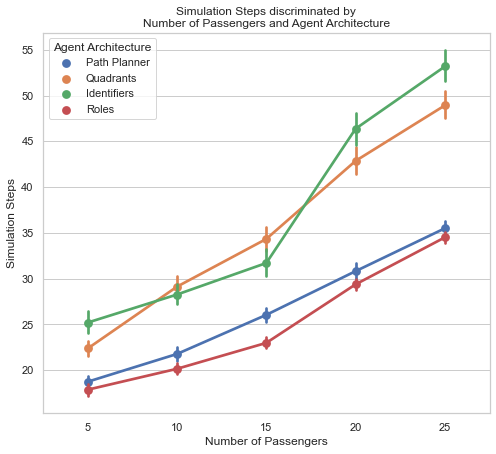

In [19]:
_, ax = plt.subplots(1, 1, figsize=(8, 7))
sns.pointplot(data=full_data, x="n_passengers", y="n_steps", hue="agent", kind="point", ci=95, ax=ax)
ax.set_title("Simulation Steps discriminated by\nNumber of Passengers and Agent Architecture")
ax.set_xlabel("Number of Passengers")
ax.set_ylabel("Simulation Steps")
plt.legend(title="Agent Architecture")
if save:
    plt.savefig("n_steps_var_pass.pdf")

In [ ]:
sns.catplot(data=full_data, x="n_passengers", y="pick_up_time", hue="agent", kind="point")

In [ ]:
sns.catplot(data=full_data, x="n_passengers", y="taxi_distance", hue="agent", kind="point")